## Objective

The objective of this study is to segment two-wheeler customers based on their bike usage during free and paid servicing periods. The customers are categorized into Light, Moderate, and Heavy service usage clusters to support efficient service resource planning and time allocation.


Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
df = pd.read_csv("/content/Two wheeler data.csv")

**STEP 1: BASIC EDA**

**Step 1.1 Understand Dataset Structure**

In [ ]:
df.head(10)


,Unnamed: 0,CID,PROD_TYPE,PROD_MOD,PROD_MOD2,CITY,CITY2,AGE,GEN,INCOME,LOAN,NUM_FREE_VIS,NUM_PAID_VIS,FREE_AV_US,PAID_AV_US,PAID_AV_TIME,PAID_AV_FD,NUM_OVRCH,VISIT3,VISTIME_23
0,1,ABC1,PB,PB1,9,HYD,3,41,1,8.95,0,3,2,3038.47,5929.42,161.0,9.1,1.0,0.0,NaN
1,2,ABC2,SC,SC3,2,HYD,3,41,1,7.61,0,3,2,1487.09,2477.93,183.0,8.1,0.0,0.0,NaN
2,3,ABC3,SC,SC1,0,MUM,0,42,0,14.72,0,2,1,3337.89,8541.09,313.0,6.4,0.0,NaN,NaN
3,4,ABC4,PB,PB2,10,HYD,3,39,0,13.65,1,1,0,4862.40,NaN,NaN,NaN,NaN,NaN,NaN
4,5,ABC5,SC,SC3,2,MUM,0,46,0,17.67,0,3,1,2684.76,7786.02,259.0,6.5,1.0,NaN,NaN
5,6,ABC6,PB,PB2,10,DEL,2,43,1,11.78,1,2,0,4373.79,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ABC7,PB,PB1,9,BNG,1,46,0,19.61,1,3,1,2824.50,7825.61,264.0,6.7,0.0,NaN,NaN
7,8,ABC8,SB,SB5,5,BNG,1,29,1,3.25,1,3,1,1729.92,7081.49,355.0,8.4,0.0,NaN,NaN
8,9,ABC9,SC,SC4,3,DEL,2,40,0,19.55,0,3,1,2381.19,8819.80,311.0,7.1,2.0,NaN,NaN
9,10,ABC10,SC,SC3,2,DEL,2,41,1,8.01,0,1,1,3511.39,7530.81,318.0,6.0,0.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18590 entries, 0 to 18589
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18590 non-null  int64  
 1   CID           18590 non-null  object 
 2   PROD_TYPE     18590 non-null  object 
 3   PROD_MOD      18590 non-null  object 
 4   PROD_MOD2     18590 non-null  int64  
 5   CITY          18590 non-null  object 
 6   CITY2         18590 non-null  int64  
 7   AGE           18590 non-null  int64  
 8   GEN           18590 non-null  int64  
 9   INCOME        18590 non-null  float64
 10  LOAN          18590 non-null  int64  
 11  NUM_FREE_VIS  18590 non-null  int64  
 12  NUM_PAID_VIS  18590 non-null  int64  
 13  FREE_AV_US    18527 non-null  float64
 14  PAID_AV_US    13992 non-null  float64
 15  PAID_AV_TIME  13992 non-null  float64
 16  PAID_AV_FD    13992 non-null  float64
 17  NUM_OVRCH     13992 non-null  float64
 18  VISIT3        4629 non-nul

In [ ]:
df.shape

(18590, 20)

In [ ]:
df.describe()

,Unnamed: 0,PROD_MOD2,CITY2,AGE,GEN,INCOME,LOAN,NUM_FREE_VIS,NUM_PAID_VIS,FREE_AV_US,PAID_AV_US,PAID_AV_TIME,PAID_AV_FD,NUM_OVRCH,VISIT3,VISTIME_23
count,18590.000000,18590.000000,18590.000000,18590.00000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000,18527.000000,13992.000000,13992.000000,13992.000000,13992.000000,4629.000000,562.000000
mean,9295.500000,4.116837,2.526358,39.93475,0.301022,12.601939,0.468424,2.549489,1.002636,2862.229161,6395.174428,240.088050,7.003052,0.197541,0.121409,338.786477
std,5366.615088,2.904363,1.706607,5.04004,0.458715,5.005172,0.499015,0.617320,0.705216,1170.824165,2467.284867,55.102337,1.004957,0.422544,0.326637,32.655070
min,1.000000,0.000000,0.000000,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,557.400000,1066.890000,116.000000,3.000000,0.000000,0.000000,225.000000
25%,4648.250000,2.000000,1.000000,37.00000,0.000000,9.200000,0.000000,2.000000,1.000000,1932.900000,3449.075000,191.000000,6.300000,0.000000,0.000000,320.000000
50%,9295.500000,4.000000,3.000000,40.00000,0.000000,12.610000,0.000000,3.000000,1.000000,2441.870000,7345.895000,243.000000,7.000000,0.000000,0.000000,342.000000
75%,13942.750000,7.000000,4.000000,43.00000,1.000000,16.050000,1.000000,3.000000,1.000000,3809.520000,8331.617500,282.000000,7.700000,0.000000,0.000000,361.000000
max,18590.000000,10.000000,5.000000,59.00000,1.000000,33.150000,1.000000,3.000000,2.000000,7551.730000,11757.180000,423.000000,10.000000,2.000000,1.000000,423.000000


**Step 1.2 Missing Value Analysis**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
CID,0
PROD_TYPE,0
PROD_MOD,0
PROD_MOD2,0
CITY,0
CITY2,0
AGE,0
GEN,0
INCOME,0


**Step 1.3 Distribution Check (EDA Visualization)**

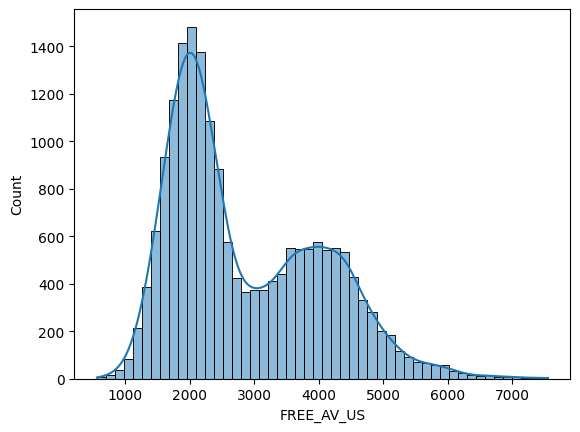

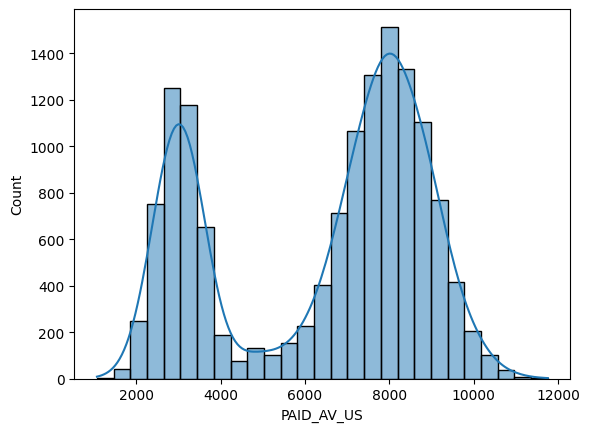

In [ ]:
sns.histplot(df['FREE_AV_US'], kde=True)
plt.show()

sns.histplot(df['PAID_AV_US'], kde=True)
plt.show()

**Step 1.4 Outlier Analysis**

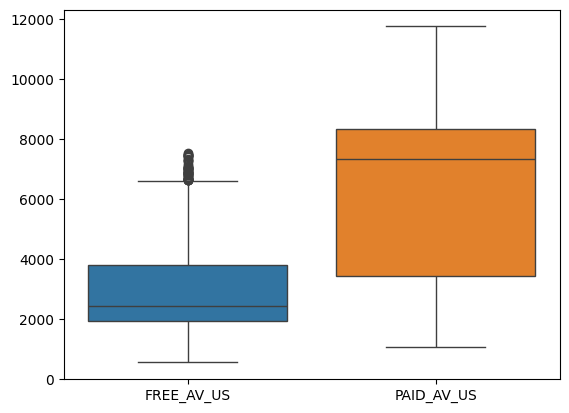

In [ ]:
sns.boxplot(data=df[['FREE_AV_US', 'PAID_AV_US']])
plt.show()


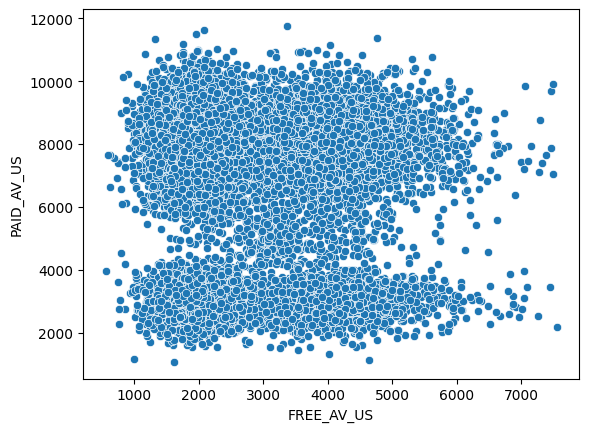

In [ ]:
sns.scatterplot(x='FREE_AV_US', y='PAID_AV_US', data=df)
plt.show()


### Key EDA Observations

- Free and paid service usage variables exhibit significant variability and non-normal distributions.
- Bimodal patterns indicate the presence of distinct customer usage groups.
- Outliers represent heavy-usage customers and are retained as they are business-relevant.


**STEP 2: DATA PREPROCESSING**

**Step 2.1 Handling Missing Values**

We only require:

FREE_AV_US

PAID_AV_US

NUM_PAID_VIS

VISIT3

Records with missing paid service information were removed, as paid usage variables are essential for clustering. The missingness is behavioral in nature, arising from customers who have not reached the paid service stage.


In [ ]:
df_clean = df[['CID','VISIT3','NUM_PAID_VIS','FREE_AV_US','PAID_AV_US']].dropna()
df_clean.shape

(4629, 5)

After restricting the dataset to variables relevant for clustering and sequential filtering, records with missing values were removed. This resulted in a final dataset of 4,629 customers who had complete information on free and paid usage. The reduction in sample size is attributable to the business process, as paid servicing data is available only for customers who progressed beyond the free service period.

**Step 2.2 Sequential Filtering**

Condition given in assignment:

VISIT3 = 1

NUM_PAID_VIS = 2

In [ ]:
df_v3 = df_clean[df_clean['VISIT3'] == 1]
df_v3.shape


(562, 5)

Filtering the dataset for customers who have completed the third service visit (VISIT3 = 1) results in 562 customers. These customers represent a mature usage cohort with sufficient service history, making them appropriate candidates for usage-based clustering.

In [ ]:
df_final = df_v3[df_v3['NUM_PAID_VIS'] == 2]
df_final.shape

(562, 5)

Applying the second sequential filter (NUM_PAID_VIS = 2) does not reduce the dataset further, indicating that all customers who completed the third visit also had exactly two paid service visits.

In [ ]:
X = df_final[['FREE_AV_US', 'PAID_AV_US']]
X.describe()


,FREE_AV_US,PAID_AV_US
count,562.000000,562.000000
mean,2520.608310,3196.004395
std,1178.969178,667.130183
min,557.400000,1528.100000
25%,1630.385000,2748.682500
50%,2150.810000,3168.435000
75%,3521.820000,3540.907500
max,6490.130000,5843.620000


**Step 2.3 Feature Selection**

In [ ]:
df_cluster = df_filtered[['FREE_AV_US', 'PAID_AV_US']]

**Step 2.4 Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=['FREE_AV_US', 'PAID_AV_US']).describe()

,FREE_AV_US,PAID_AV_US
count,5.620000e+02,5.620000e+02
mean,-2.971131e-16,-2.275760e-16
std,1.000891e+00,1.000891e+00
min,-1.666674e+00,-2.502346e+00
25%,-7.557588e-01,-6.711140e-01
50%,-3.139418e-01,-4.136218e-02
75%,8.499829e-01,5.174558e-01
max,3.369942e+00,3.972200e+00


After standardization, both usage variables exhibit a mean approximately equal to zero and a standard deviation close to one. This confirms that the features have been successfully scaled, ensuring that neither free nor paid usage dominates the distance calculations in K-means clustering.

**STEP 3: CLUSTERING USING K-MEANS**

**Step 3.1 Elbow Method to Find Optimal K**

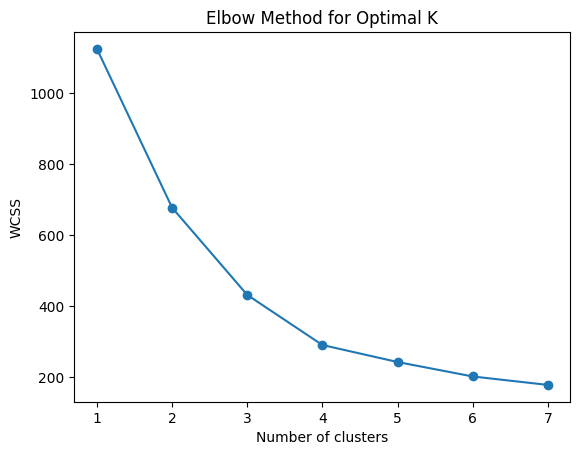

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,8), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


### Elbow Method Interpretation

The elbow point is observed at K = 3, beyond which the reduction in within-cluster sum of squares becomes marginal. Hence, three clusters were selected for further analysis.


**Step 3.2 Model Fitting**

Apply K-Means with K = 3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_final['Cluster'] = clusters
df_final['Cluster'].value_counts()


,count
Cluster,
1,268
2,154
0,140


The K-means algorithm segmented the customers into three reasonably sized clusters, ensuring that no single cluster dominates the population. This indicates stable and meaningful clustering based on usage behavior.

**Step 4: Cluster Interpretation**

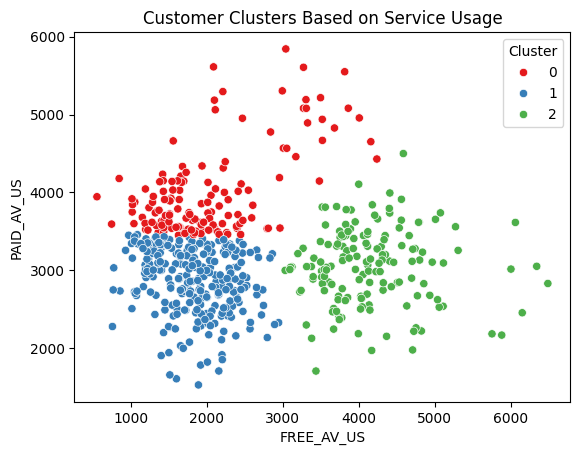

In [ ]:
sns.scatterplot(
    x=df_final['FREE_AV_US'],
    y=df_final['PAID_AV_US'],
    hue=df_final['Cluster'],
    palette='Set1'
)
plt.title('Customer Clusters Based on Service Usage')
plt.show()

**Step 4.1 Cluster Centroid Analysis**

In [ ]:
centroids_scaled = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=['FREE_AV_US', 'PAID_AV_US']
)

centroids_scaled


,FREE_AV_US,PAID_AV_US
0,-0.416078,1.206240
1,-0.582506,-0.500910
2,1.391965,-0.224868


In [ ]:
centroids_original = pd.DataFrame(
    scaler.inverse_transform(centroids_scaled),
    columns=['FREE_AV_US', 'PAID_AV_US']
)

centroids_original


,FREE_AV_US,PAID_AV_US
0,2030.501714,4000.007357
1,1834.462836,2862.129590
2,4160.231104,3046.121494


Cluster 1 (LIGHT): Customers in this cluster exhibit low usage during both free and paid service periods, indicating minimal wear and tear and limited servicing needs.

Cluster 0 (MODERATE): This cluster represents customers whose usage increases significantly during the paid servicing phase, resulting in moderate servicing effort and resource allocation requirements.

Cluster 2 (HEAVY): Customers in this cluster demonstrate very high usage during the free service period itself, indicating aggressive vehicle utilization and a higher servicing burden throughout the ownership lifecycle.

**Step 4.2 Cluster labeling**

In [ ]:
cluster_map = {
    1: 'Light',
    0: 'Moderate',
    2: 'Heavy'
}

df_final['Customer_Type'] = df_final['Cluster'].map(cluster_map)


In [ ]:
df_final.groupby('Customer_Type')[['FREE_AV_US','PAID_AV_US']].mean()


,FREE_AV_US,PAID_AV_US
Customer_Type,,
Heavy,4160.231104,3046.121494
Light,1834.462836,2862.129590
Moderate,2030.501714,4000.007357


**Step 4.3 Cluster Visualization**

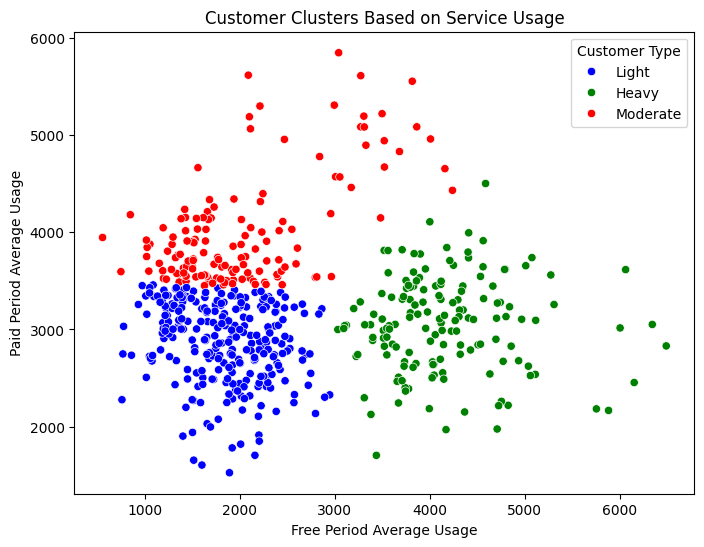

In [ ]:
palette = {
    'Light': 'blue',
    'Moderate': 'red',
    'Heavy': 'green'
}

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='FREE_AV_US',
    y='PAID_AV_US',
    hue='Customer_Type',
    palette=palette
)

plt.title('Customer Clusters Based on Service Usage')
plt.xlabel('Free Period Average Usage')
plt.ylabel('Paid Period Average Usage')
plt.legend(title='Customer Type')
plt.show()


**FINAL CONCLUSION**

Using K-Means clustering on FREE and PAID service usage, we successfully segmented customers into three actionable clusters, enabling efficient servicing strategy and resource allocation.

The final cluster validation confirms a clear separation of customers based on servicing intensity. Light customers exhibit the lowest usage during both free and paid service periods and therefore require minimal servicing effort. Moderate customers show a significant increase in usage during the paid service phase, necessitating moderate resources and time. Heavy customers demonstrate very high usage during the free service period itself, indicating intensive vehicle utilization and consistently high servicing requirements. This segmentation provides actionable insights for service capacity planning and resource allocation.

#BUSINESS INSIGHTS


*   Heavy customers should be prioritized for preventive maintenance and skilled
technicians
*   Moderate customers require careful scheduling during paid service periods

*   Light customers can be routed through faster service lanes with minimal resource allocation








